In [110]:
import os
import pandas as pd
import glob
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [111]:
# folders = os.listdir('models')
data_types = ['EDA', 'EEG', 'PUPIL', 'GAZE', 'MOTION',]#'EYE', ]
# folders
target_name = 'stage'
target_set1 = ['IN','QF', 'QS', 'RJ',]
target_set2 = ['IN', 'QF', 'TYPE', 'SPEAK', 'LISTEN','READ',]

taget_labels = ['IN', 'QF', 'QS-T', 'QS-S', 'RJ-L', 'RJ-R']

## 4 class (not in used)

In [2]:
folder = '(v3)25_12_2024-05_00_PM'
clfs = dict()
for dt in data_types:
    file = glob.glob(f'models/{folder}/*(6)-{dt}-*')[0]
    print(file)
    clf = pickle.load(open(file, 'rb'))
    clfs.update({dt: clf})
clf.keys()

NameError: name 'glob' is not defined

In [377]:
scores = dict()
for key, clf in clfs.items():
    score = pd.DataFrame(
        {
            'test_ROC': clf['test_ROC'],
            'train_ROC': clf['train_ROC'],
            'test_Accuracy': clf['test_Accuracy'],
            'train_Accuracy': clf['train_Accuracy'],
            'test_F1-macro': clf['test_F1-macro'], 
            'train_F1-macro': clf['train_F1-macro']
        }
    )
    scores.update({key: score})
scores['EEG']

,test_ROC,train_ROC,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro
0,0.729083,0.993683,0.386364,0.933921,0.346185,0.934419
1,0.793056,0.995326,0.562500,0.933628,0.570476,0.934061
2,0.787772,0.995446,0.454545,0.941630,0.444871,0.942713
3,0.783039,0.991956,0.520833,0.930310,0.518433,0.930033
4,0.785547,0.993634,0.520833,0.932522,0.511603,0.933137
5,0.807276,0.989882,0.583333,0.914823,0.552793,0.915297
6,0.722156,0.993854,0.458333,0.925885,0.470467,0.926429
7,0.779799,0.992550,0.541667,0.929204,0.543426,0.929394
8,0.808780,0.991666,0.583333,0.926991,0.580269,0.927593
9,0.780351,0.992312,0.541667,0.926991,0.531740,0.927585


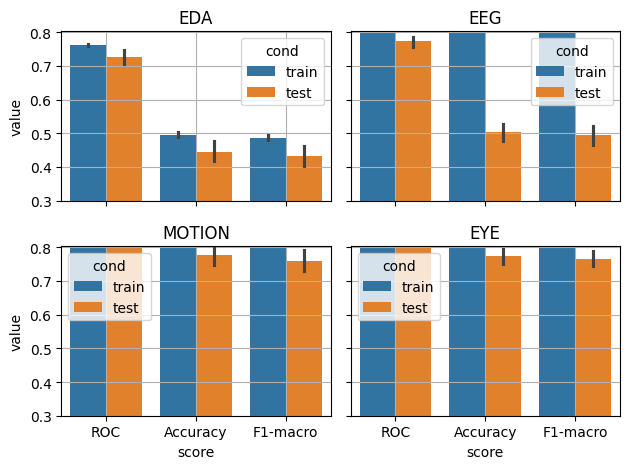

In [378]:
_, ax = plt.subplots(2,2, sharex=True, sharey=True)
r, c = 0,0
for key, score in scores.items():
    x = score.melt()
    x['score'] = [a.split('_')[1] for a in x.variable]
    x['cond'] = [a.split('_')[0] for a in x.variable]
    sns.barplot(data=x, x='score', y='value', hue='cond', ax=ax[r,c], hue_order=['train', 'test'])
    ax[r,c].grid()
    ax[r,c].set_ylim(0.3)
    ax[r,c].set_title(key)
    c += 1
    if c == 2:
        r += 1
        c = 0
plt.tight_layout()
plt.show()

In [379]:
avgs = []
for key, val in scores.items():
    val['data'] = key
    avgs.append(val)
avgs = pd.concat(avgs)
avgs

,test_ROC,train_ROC,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro,data
0,0.683141,0.761198,0.409091,0.492291,0.402237,0.487806,EDA
1,0.690389,0.765502,0.479167,0.488938,0.483075,0.480452,EDA
2,0.800900,0.759457,0.500000,0.468062,0.445358,0.472425,EDA
3,0.755124,0.760954,0.437500,0.522124,0.471853,0.510924,EDA
4,0.808887,0.763508,0.604167,0.508850,0.583086,0.496331,EDA
...,...,...,...,...,...,...,...
13,0.936490,0.967417,0.791667,0.843866,0.785844,0.844016,EYE
14,0.950527,0.966117,0.770833,0.826518,0.740201,0.825782,EYE
15,0.948557,0.974630,0.729167,0.848823,0.730370,0.848785,EYE
16,0.957369,0.970042,0.875000,0.853779,0.858383,0.853947,EYE


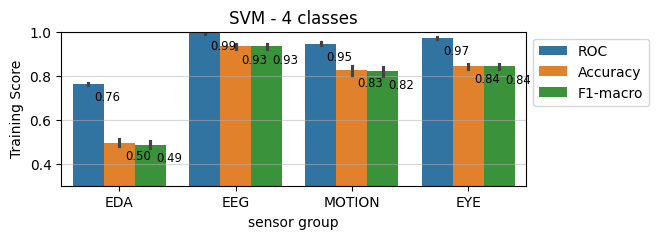

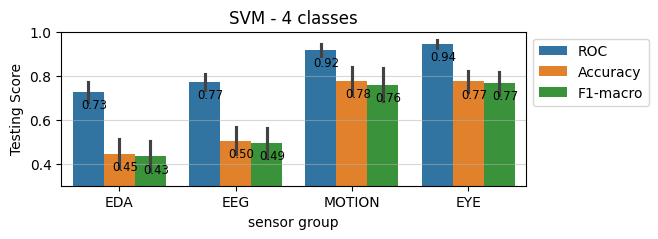

In [380]:
mm = avgs.melt('data')
mm['score'] = [v.split('_')[1] for v in mm['variable']]
mm['cond'] = [v.split('_')[0] for v in mm['variable']]

_, ax=plt.subplots(figsize=(6,2))
sns.barplot(data=mm[mm.cond == 'train'], x='data', y='value', hue='score', ax=ax, errorbar='sd')
ax.grid(axis='y', alpha=0.5)
ax.set_xlabel('sensor group')
ax.set_ylim(0.3, 1)
ax.set_title('SVM - 4 classes') 

for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2.+0.05, h-0.03)
    text = f'{h:0.2f}'
    ax.annotate(text=text, xy=xy, ha='left', va='top', fontsize='small')
ax.set_ylabel('Training Score')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()



_, ax=plt.subplots(figsize=(6,2))
sns.barplot(data=mm[mm.cond == 'test'], x='data', y='value', hue='score', ax=ax, errorbar='sd')
ax.grid(axis='y', alpha=0.5)
ax.set_xlabel('sensor group')
ax.set_ylim(0.3, 1)
ax.set_title('SVM - 4 classes') 

for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2.+0.05, h-0.03)
    text = f'{h:0.2f}'
    ax.annotate(text=text, xy=xy, ha='center', va='top', fontsize='small')
ax.set_ylabel('Testing Score')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [381]:
avgs.groupby('data').mean().round(3)

,test_ROC,train_ROC,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro
data,,,,,,
EDA,0.727,0.762,0.445,0.496,0.434,0.487
EEG,0.773,0.993,0.505,0.933,0.494,0.934
EYE,0.943,0.970,0.774,0.843,0.766,0.843
MOTION,0.917,0.946,0.775,0.825,0.759,0.820


In [382]:
avgs.groupby('data').std().round(3)

,test_ROC,train_ROC,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro
data,,,,,,
EDA,0.047,0.006,0.066,0.017,0.069,0.014
EEG,0.036,0.002,0.061,0.011,0.067,0.011
EYE,0.019,0.004,0.047,0.011,0.052,0.011
MOTION,0.025,0.008,0.064,0.020,0.076,0.022


### AUC

In [383]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from itertools import cycle
import re

def add_plot(ax, y_onehot_test, y_score, data_type):
    
    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    print(f"Micro-averaged One-vs-Rest ROC AUC score: {roc_auc['micro']:.2f}")
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr_grid = np.linspace(0.0, 1.0, 1000)
    
    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)
    
    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation
    
    # Average it and compute AUC
    mean_tpr /= n_classes
    
    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    print(f"Macro OvR ROC AUC score: {roc_auc['macro']:.2f}")

    ax.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro AUC={roc_auc['macro']:.2f}",
    color="navy",
    linestyle=":",
    linewidth=4,
    )

    colors = cycle(["#FF6F61", "#6B5B95", "#88B04B", "#FFAA1D", "#92A8D1", "#955251",])
    
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"{target_set[class_id]}",
            color=color,
            ax=ax,
            plot_chance_level=(class_id == n_classes-1),
        )
    
    _ = ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"{data_type}({n_classes})",
        # title=f"Four Classes SVM with {data_type}\n One-vs-Rest multiclass",
    )
    ax.legend(loc='lower right', fontsize='x-small', handlelength=1, columnspacing=1, handletextpad=0.5, 
             borderpad=0.2, labelspacing=0.2)
    return ax


def load_scores(clfs, data_type, n_classes):
    print(data_type, n_classes)
    df = pd.read_csv(f'../trainning data/train/{data_type}({n_classes}).csv')
    features = [f for f in df.columns if f.__contains__(':')]
    print('n features', len(features))
    
    y_score, y_true = [],np.array([])
    for n, idx in enumerate(clfs[data_type]['indices']['test']):
        X = df.loc[idx]
        model = clfs[data_type]['estimator'][n]
        x_test = X[features].values
        y_true = np.append(y_true, X[target_name].values)
        y_score.append(model.predict_proba(x_test))
    y_score = np.concatenate(y_score)
    return y_score, y_true


EDA 4
n features 29
Micro-averaged One-vs-Rest ROC AUC score: 0.77
Macro OvR ROC AUC score: 0.76
EEG 4
n features 180
Micro-averaged One-vs-Rest ROC AUC score: 0.98
Macro OvR ROC AUC score: 0.98
MOTION 4
n features 13
Micro-averaged One-vs-Rest ROC AUC score: 0.96
Macro OvR ROC AUC score: 0.95
EYE 4
n features 32
Micro-averaged One-vs-Rest ROC AUC score: 0.97
Macro OvR ROC AUC score: 0.97


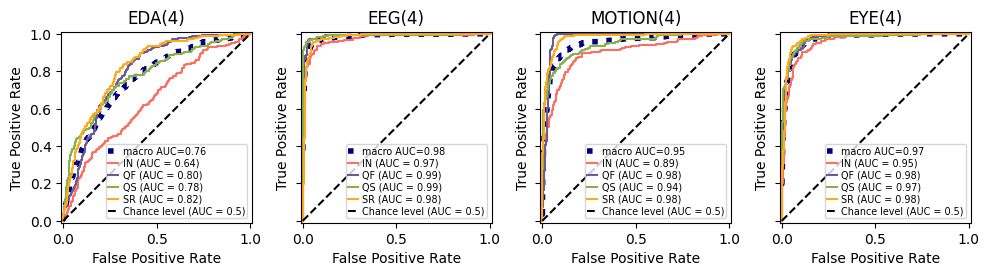

In [384]:
label_binarizer = None
target_set = target_set1
n_classes = 4

fig, axes = plt.subplots(ncols=4, figsize=(10, 6), sharex=True, sharey=True)

for n, data_type in enumerate(clfs.keys()):
    y_score, y_true = load_scores(clfs, data_type, n_classes)
    if label_binarizer is None:
        label_binarizer = LabelBinarizer().fit(y_true)
    y_onehot_test = label_binarizer.transform(y_true)
    add_plot(axes[n], y_onehot_test, y_score, data_type)

plt.tight_layout()
plt.savefig(f'AUC_SVM_OVR_{n_classes}_classification.pdf', bbox_inches='tight')
plt.show()

### Confusion Matrix

In [29]:
# from sklearn.metrics import confusion_matrix

# def load_cm_scores(clfs, data_type, n_classes):
#     print(data_type, n_classes)
#     df = pd.read_csv(f'../trainning data/train/{data_type}({n_classes}).csv')
#     features = [f for f in df.columns if f.__contains__(':')]
#     print('n features', len(features))
    
#     y_score, y_true = np.array([]), np.array([])
#     for n, idx in enumerate(clfs[data_type]['indices']['test']):
#         X = df.loc[idx]
#         model = clfs[data_type]['estimator'][n]
#         x_test = X[features].values
#         y_true = np.append(y_true, X[target_name].values)
#         y_score = np.append(y_score, model.predict(x_test))
#     return y_score, y_true


## single sensor group

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def load_data(folder, tw='*'):
    clfs = dict()
    for dt in data_types:
        file = glob.glob(f'models/{folder}/*(6)-{tw}-{dt}-*')[0]
        print(file)
        clf = pickle.load(open(file, 'rb'))
        clfs.update({dt: clf})
    return clfs


def load_scores(clfs, label):
    scores = dict()
    for key, clf in clfs.items():
        score = pd.DataFrame(
            {
                'test_Precision': clf['test_Precision'],
                'train_Precision': clf['train_Precision'],
                'test_Recall': clf['test_Recall'],
                'train_Recall': clf['train_Recall'],
                'test_Accuracy': clf['test_Accuracy'],
                'train_Accuracy': clf['train_Accuracy'],
                'test_F1-macro': clf['test_F1-macro'], 
                'train_F1-macro': clf['train_F1-macro']
            }
        )
        scores.update({key: score})

    avgs = []
    for key, val in scores.items():
        val['data'] = key
        avgs.append(val)
    avgs = pd.concat(avgs)
    avgs['tw'] = label
    return scores, avgs


def load_predictions(clf):
    y_pred = []
    for a in clf['y_pred']: 
        for i in a:
            y_pred.append(i)
            
    y_true = []
    for b in clf['y_true']: 
        for c in b:
            y_true.append(c)
    print('y_pred size:', len(y_pred), 'y_true size:', len(y_true))
    return y_pred, y_true


def plot_cm(clfs, target_labels, tw, out=None):
    _, ax= plt.subplots(ncols=5, figsize=(11,6), sharex=True, sharey=True)
    
    for n, data_type in enumerate(data_types):
        clf = clfs[data_type]
        y_score, y_true = load_predictions(clf)
        labels = np.unique(y_true)
        cm = confusion_matrix(y_true, y_score, labels=labels)#, normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=labels)
        disp.plot(ax=ax[n], cmap=plt.cm.Blues, values_format='d', colorbar=False, im_kw={}, text_kw={'fontsize': 10})
        ax[n].set_title(f"{data_type}({tw})")
        ax[n].set_yticklabels(target_labels, fontsize=9)
        ax[n].set_xticklabels(target_labels, fontsize=9)

        # for text in ax[n].texts:  # ax.texts contains all the annotations
        #     value = text.get_text()
        #     # if value == '0.00':  # Remove annotation for zeros
        #     #     text.set_text('.0')
        #     # else:  # Remove leading zeros for non-zero values
        #     text.set_text(value.lstrip('0'))
        if n > 0: ax[n].set_ylabel(None)
        
        
    plt.tight_layout()
    if out:
        plt.savefig(out, bbox_inches='tight')
    plt.show()

In [113]:
clfs = load_data('(v3)11_01_2025-07_29_PM', tw='4-2')
print(clfs['EDA'].keys())
scores, avgs = load_scores(clfs, '4-2')
avgs

models/(v3)11_01_2025-07_29_PM/SVM(6)-4-2-EDA-11_01_2025-07_31_PM.pkl
models/(v3)11_01_2025-07_29_PM/SVM(6)-4-2-EEG-11_01_2025-07_29_PM.pkl
models/(v3)11_01_2025-07_29_PM/SVM(6)-4-2-PUPIL-11_01_2025-07_30_PM.pkl
models/(v3)11_01_2025-07_29_PM/SVM(6)-4-2-GAZE-11_01_2025-07_30_PM.pkl
models/(v3)11_01_2025-07_29_PM/SVM(6)-4-2-MOTION-11_01_2025-07_29_PM.pkl
dict_keys(['fit_time', 'score_time', 'estimator', 'indices', 'test_ROC', 'train_ROC', 'test_Accuracy', 'train_Accuracy', 'test_F1-macro', 'train_F1-macro', 'test_Precision', 'train_Precision', 'test_Recall', 'train_Recall', 'y_pred', 'y_true'])


,test_Precision,train_Precision,test_Recall,train_Recall,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro,data,tw
0,0.076557,0.672459,0.136905,0.252040,0.229167,0.332827,0.094422,0.228631,EDA,4-2
1,0.381963,0.617915,0.202652,0.257904,0.181818,0.340152,0.172195,0.236072,EDA,4-2
2,0.120370,0.616154,0.199430,0.249010,0.250000,0.326748,0.122751,0.230700,EDA,4-2
3,0.233245,0.589807,0.275350,0.254738,0.431818,0.333333,0.237013,0.235073,EDA,4-2
4,0.260684,0.479010,0.201437,0.251619,0.291667,0.330547,0.166805,0.230795,EDA,4-2
...,...,...,...,...,...,...,...,...,...,...
24,0.629464,0.774480,0.544048,0.721737,0.562500,0.740122,0.562609,0.737030,MOTION,4-2
25,0.714406,0.774958,0.627778,0.721793,0.625000,0.738602,0.645466,0.736895,MOTION,4-2
26,0.446460,0.779727,0.483822,0.728549,0.437500,0.745441,0.440079,0.743382,MOTION,4-2
27,0.539394,0.770498,0.567460,0.722944,0.520833,0.742401,0.536344,0.737603,MOTION,4-2


y_pred size: 1364 y_true size: 1364
y_pred size: 1354 y_true size: 1354
y_pred size: 1267 y_true size: 1267
y_pred size: 1264 y_true size: 1264
y_pred size: 1364 y_true size: 1364


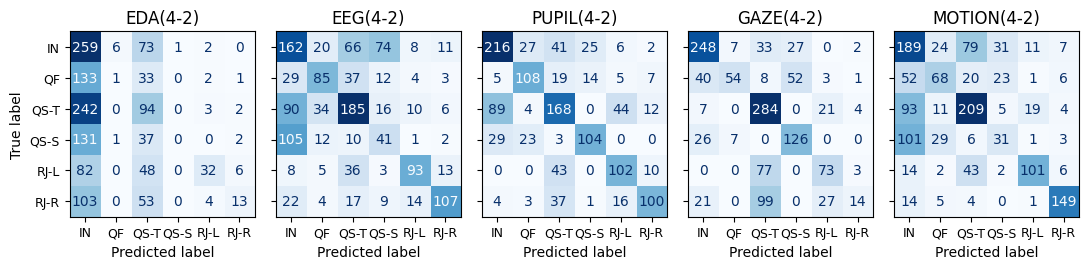

In [114]:
plot_cm(clfs, ['IN', 'QF','QS-T', 'QS-S', 'RJ-L','RJ-R', ], '4-2', '../images/CM-prediction-4-2.pdf')

In [115]:
clfs2 = load_data('(v3)11_01_2025-07_29_PM', '2-1')
print(clfs2['EDA'].keys())
scores2, avgs2 = load_scores(clfs2, '2-1')
avgs = pd.concat([avgs, avgs2])
avgs

models/(v3)11_01_2025-07_29_PM/SVM(6)-2-1-EDA-11_01_2025-07_34_PM.pkl
models/(v3)11_01_2025-07_29_PM/SVM(6)-2-1-EEG-11_01_2025-07_31_PM.pkl
models/(v3)11_01_2025-07_29_PM/SVM(6)-2-1-PUPIL-11_01_2025-07_32_PM.pkl
models/(v3)11_01_2025-07_29_PM/SVM(6)-2-1-GAZE-11_01_2025-07_32_PM.pkl
models/(v3)11_01_2025-07_29_PM/SVM(6)-2-1-MOTION-11_01_2025-07_31_PM.pkl
dict_keys(['fit_time', 'score_time', 'estimator', 'indices', 'test_ROC', 'train_ROC', 'test_Accuracy', 'train_Accuracy', 'test_F1-macro', 'train_F1-macro', 'test_Precision', 'train_Precision', 'test_Recall', 'train_Recall', 'y_pred', 'y_true'])


,test_Precision,train_Precision,test_Recall,train_Recall,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro,data,tw
0,0.076557,0.672459,0.136905,0.252040,0.229167,0.332827,0.094422,0.228631,EDA,4-2
1,0.381963,0.617915,0.202652,0.257904,0.181818,0.340152,0.172195,0.236072,EDA,4-2
2,0.120370,0.616154,0.199430,0.249010,0.250000,0.326748,0.122751,0.230700,EDA,4-2
3,0.233245,0.589807,0.275350,0.254738,0.431818,0.333333,0.237013,0.235073,EDA,4-2
4,0.260684,0.479010,0.201437,0.251619,0.291667,0.330547,0.166805,0.230795,EDA,4-2
...,...,...,...,...,...,...,...,...,...,...
24,0.599504,0.768870,0.533730,0.703673,0.520833,0.724924,0.538178,0.719055,MOTION,2-1
25,0.656555,0.762204,0.558333,0.703008,0.541667,0.724924,0.559440,0.717531,MOTION,2-1
26,0.457458,0.763501,0.457875,0.707069,0.437500,0.724924,0.434214,0.721924,MOTION,2-1
27,0.645632,0.764502,0.639881,0.709802,0.604167,0.727964,0.549626,0.725357,MOTION,2-1


y_pred size: 1364 y_true size: 1364
y_pred size: 1364 y_true size: 1364
y_pred size: 1267 y_true size: 1267
y_pred size: 1264 y_true size: 1264
y_pred size: 1364 y_true size: 1364


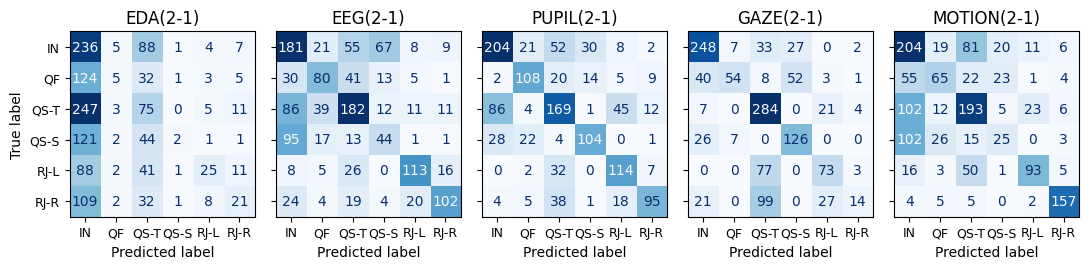

In [27]:
plot_cm(clfs2, ['IN', 'QF','QS-T', 'QS-S', 'RJ-L','RJ-R', ], '2-1', '../images/CM-prediction-2-1.pdf')

In [116]:
clfs3 = load_data('(v3)11_01_2025-07_29_PM', '1-0')
print(clfs3['EDA'].keys())
scores3, avgs3 = load_scores(clfs2, '1-0')
avgs = pd.concat([avgs, avgs3])
avgs

models/(v3)11_01_2025-07_29_PM/SVM(6)-1-0-EDA-11_01_2025-08_49_PM.pkl
models/(v3)11_01_2025-07_29_PM/SVM(6)-1-0-EEG-11_01_2025-08_48_PM.pkl
models/(v3)11_01_2025-07_29_PM/SVM(6)-1-0-PUPIL-11_01_2025-08_48_PM.pkl
models/(v3)11_01_2025-07_29_PM/SVM(6)-1-0-GAZE-11_01_2025-08_48_PM.pkl
models/(v3)11_01_2025-07_29_PM/SVM(6)-1-0-MOTION-11_01_2025-08_48_PM.pkl
dict_keys(['fit_time', 'score_time', 'estimator', 'indices', 'test_ROC', 'train_ROC', 'test_Accuracy', 'train_Accuracy', 'test_F1-macro', 'train_F1-macro', 'test_Precision', 'train_Precision', 'test_Recall', 'train_Recall', 'y_pred', 'y_true'])


,test_Precision,train_Precision,test_Recall,train_Recall,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro,data,tw
0,0.076557,0.672459,0.136905,0.252040,0.229167,0.332827,0.094422,0.228631,EDA,4-2
1,0.381963,0.617915,0.202652,0.257904,0.181818,0.340152,0.172195,0.236072,EDA,4-2
2,0.120370,0.616154,0.199430,0.249010,0.250000,0.326748,0.122751,0.230700,EDA,4-2
3,0.233245,0.589807,0.275350,0.254738,0.431818,0.333333,0.237013,0.235073,EDA,4-2
4,0.260684,0.479010,0.201437,0.251619,0.291667,0.330547,0.166805,0.230795,EDA,4-2
...,...,...,...,...,...,...,...,...,...,...
24,0.599504,0.768870,0.533730,0.703673,0.520833,0.724924,0.538178,0.719055,MOTION,1-0
25,0.656555,0.762204,0.558333,0.703008,0.541667,0.724924,0.559440,0.717531,MOTION,1-0
26,0.457458,0.763501,0.457875,0.707069,0.437500,0.724924,0.434214,0.721924,MOTION,1-0
27,0.645632,0.764502,0.639881,0.709802,0.604167,0.727964,0.549626,0.725357,MOTION,1-0


In [30]:
avgs.groupby(['data', 'tw']).mean().round(2)

test_Precision  train_Precision  test_Recall  train_Recall  \
data   tw                                                                
EDA    1-0            0.25             0.60         0.21          0.27   
       2-1            0.25             0.60         0.21          0.27   
       4-2            0.24             0.59         0.22          0.25   
EEG    1-0            0.52             0.99         0.51          0.98   
       2-1            0.52             0.99         0.51          0.98   
       4-2            0.53             0.99         0.49          0.98   
GAZE   1-0            0.59             0.68         0.56          0.58   
       2-1            0.59             0.68         0.56          0.58   
       4-2            0.59             0.68         0.56          0.58   
MOTION 1-0            0.57             0.76         0.54          0.71   
       2-1            0.57             0.76         0.54          0.71   
       4-2            0.58             0.77         0.54          0.73   
PUPIL  1-0            0.67             0.70         0.65          0.69   
       2-1            0.67             0.70         0.65          0.69   
       4-2            0.67             0.70         0.65          0.69   

            test_Accuracy  train_Accuracy  test_F1-macro  train_F1-macro  
data   tw                                                                 
EDA    1-0           0.27            0.34           0.17            0.26  
       2-1           0.27            0.34           0.17            0.26  
       4-2           0.29            0.33           0.18            0.23  
EEG    1-0           0.51            0.99           0.50            0.99  
       2-1           0.51            0.99           0.50            0.99  
       4-2           0.50            0.98           0.49            0.98  
GAZE   1-0           0.63            0.65           0.53            0.57  
       2-1           0.63            0.65           0.53            0.57  
       4-2           0.63            0.65           0.53            0.57  
MOTION 1-0           0.54            0.73           0.52            0.72  
       2-1           0.54            0.73           0.52            0.72  
       4-2           0.55            0.74           0.53            0.74  
PUPIL  1-0           0.63            0.68           0.63            0.69  
       2-1           0.63            0.68           0.63            0.69  
       4-2           0.63            0.68           0.63            0.69

In [31]:
avgs.groupby(['data', 'tw']).std().round(2)

test_Precision  train_Precision  test_Recall  train_Recall  \
data   tw                                                                
EDA    1-0            0.11             0.03         0.05          0.01   
       2-1            0.11             0.03         0.05          0.01   
       4-2            0.11             0.05         0.05          0.00   
EEG    1-0            0.08             0.00         0.09          0.00   
       2-1            0.08             0.00         0.09          0.00   
       4-2            0.06             0.00         0.07          0.00   
GAZE   1-0            0.13             0.01         0.09          0.00   
       2-1            0.13             0.01         0.09          0.00   
       4-2            0.13             0.01         0.09          0.00   
MOTION 1-0            0.08             0.00         0.06          0.01   
       2-1            0.08             0.00         0.06          0.01   
       4-2            0.09             0.01         0.07          0.00   
PUPIL  1-0            0.08             0.04         0.09          0.03   
       2-1            0.08             0.04         0.09          0.03   
       4-2            0.09             0.02         0.09          0.02   

            test_Accuracy  train_Accuracy  test_F1-macro  train_F1-macro  
data   tw                                                                 
EDA    1-0           0.07            0.01           0.06            0.02  
       2-1           0.07            0.01           0.06            0.02  
       4-2           0.07            0.01           0.06            0.01  
EEG    1-0           0.07            0.00           0.09            0.00  
       2-1           0.07            0.00           0.09            0.00  
       4-2           0.06            0.00           0.06            0.00  
GAZE   1-0           0.08            0.00           0.10            0.00  
       2-1           0.08            0.00           0.10            0.00  
       4-2           0.08            0.00           0.10            0.00  
MOTION 1-0           0.06            0.00           0.06            0.01  
       2-1           0.06            0.00           0.06            0.01  
       4-2           0.07            0.00           0.07            0.00  
PUPIL  1-0           0.08            0.04           0.09            0.04  
       2-1           0.08            0.04           0.09            0.04  
       4-2           0.08            0.02           0.09            0.02

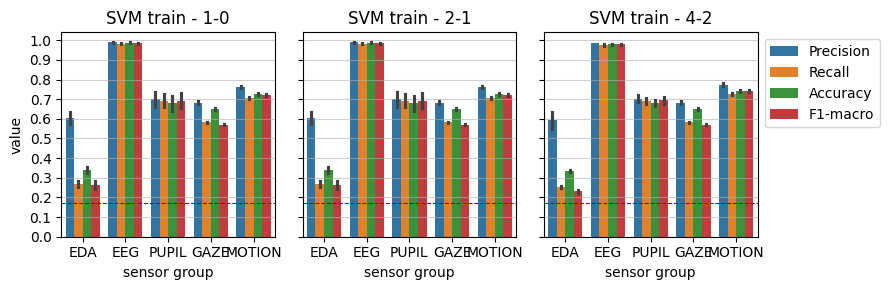

In [32]:
mm = avgs.melt(['data', 'tw'])
mm['score'] = [v.split('_')[1] for v in mm['variable']]
mm['cond'] = [v.split('_')[0] for v in mm['variable']]

_, (ax2, ax, ax1,) =plt.subplots(ncols=3, figsize=(9,3), sharex=True, sharey=True)
sns.barplot(data=mm[(mm.cond == 'train') & (mm.tw=='1-0')], x='data', y='value', hue='score', ax=ax2, errorbar='sd')
ax2.grid(axis='y', alpha=0.6)
ax2.set_xlabel('sensor group')
ax2.set_title('SVM train - 1-0') 
ax2.legend().remove()

sns.barplot(data=mm[(mm.cond == 'train') & (mm.tw=='2-1')], x='data', y='value', hue='score', ax=ax, errorbar='sd')
ax.grid(axis='y', alpha=0.6)
ax.set_xlabel('sensor group')
ax.set_title('SVM train - 2-1') 
ax.legend().remove()

sns.barplot(data=mm[(mm.cond == 'train') & (mm.tw=='4-2')], x='data', y='value', hue='score', ax=ax1, errorbar='sd')
ax1.grid(axis='y', alpha=0.6)
ax1.set_ylabel(None)
ax1.set_xlabel('sensor group')
ax1.set_title('SVM train - 4-2') 
ax1.set_yticks(np.arange(0, 1.1, 0.1))
ax1.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
ax.axhline(y=0.17, xmin=0, xmax=8, c='purple', linewidth=0.8, linestyle='--')
ax1.axhline(y=0.17, xmin=0, xmax=8, c='purple', linewidth=0.8, linestyle='--')
ax2.axhline(y=0.17, xmin=0, xmax=8, c='purple', linewidth=0.8, linestyle='--')
plt.show()

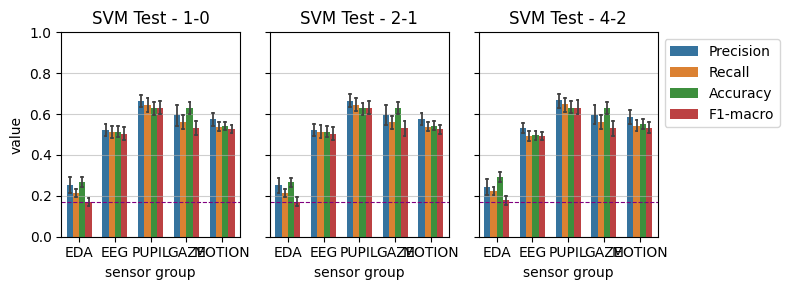

In [35]:
mm = avgs.melt(['data', 'tw'])
mm['score'] = [v.split('_')[1] for v in mm['variable']]
mm['cond'] = [v.split('_')[0] for v in mm['variable']]
w=0.7

_, (ax2, ax, ax1) =plt.subplots(ncols=3, figsize=(8,3), sharex=True, sharey=True)
sns.barplot(data=mm[(mm.cond == 'test') & (mm.tw=='1-0')], x='data', y='value', hue='score',\
            ax=ax2, errorbar=('ci', 95), width=w, saturation=0.7, capsize=0.2, err_kws={'linewidth': 1.3})
ax2.grid(axis='y', alpha=0.6)
ax2.set_xlabel('sensor group')
ax2.set_title('SVM Test - 1-0') 
ax2.legend().remove()

sns.barplot(data=mm[(mm.cond == 'test') & (mm.tw=='2-1')], x='data', y='value', hue='score',\
            ax=ax, errorbar=('ci', 95), width=w, saturation=0.7, capsize=0.2, err_kws={'linewidth': 1.3})
ax.grid(axis='y', alpha=0.6)
ax.set_xlabel('sensor group')
ax.set_title('SVM Test - 2-1') 
ax.legend().remove()

sns.barplot(data=mm[(mm.cond == 'test') & (mm.tw=='4-2')], x='data', y='value', hue='score', \
            ax=ax1, errorbar=('ci', 95), width=w, saturation=0.7,capsize=0.2, err_kws={'linewidth': 1.3})
ax1.grid(axis='y', alpha=0.6)
ax1.set_ylabel(None)
ax1.set_xlabel('sensor group')
ax1.set_title('SVM Test - 4-2') 
ax1.legend(bbox_to_anchor=(1, 1))
ax1.set_yticks(np.arange(0, 1.1, 0.2))
plt.tight_layout()
ax.axhline(y=0.17, xmin=0, xmax=8, c='purple', linewidth=0.8, linestyle='--')
ax1.axhline(y=0.17, xmin=0, xmax=8, c='purple', linewidth=0.8, linestyle='--')
ax2.axhline(y=0.17, xmin=0, xmax=8, c='purple', linewidth=0.8, linestyle='--')
plt.show()


In [117]:
# mm = avgs.melt(['data', 'tw'])
# mm['score'] = [v.split('_')[1] for v in mm['variable']]
# mm['cond'] = [v.split('_')[0] for v in mm['variable']]
# # mm = mm[(mm.score.isin(['Accuracy', 'F1-macro'])) & (mm.cond == 'test')]
# mm

,data,tw,variable,value,score,cond
0,EDA,4-2,test_Precision,0.076557,Precision,test
1,EDA,4-2,test_Precision,0.381963,Precision,test
2,EDA,4-2,test_Precision,0.120370,Precision,test
3,EDA,4-2,test_Precision,0.233245,Precision,test
4,EDA,4-2,test_Precision,0.260684,Precision,test
...,...,...,...,...,...,...
3379,MOTION,1-0,train_F1-macro,0.719055,F1-macro,train
3380,MOTION,1-0,train_F1-macro,0.717531,F1-macro,train
3381,MOTION,1-0,train_F1-macro,0.721924,F1-macro,train
3382,MOTION,1-0,train_F1-macro,0.725357,F1-macro,train


In [118]:
# mm.to_csv('../results/single_classification.csv', index=False)

/tmp/ipykernel_20532/4188260468.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks, fontsize=9, rotation=13,ha='center')


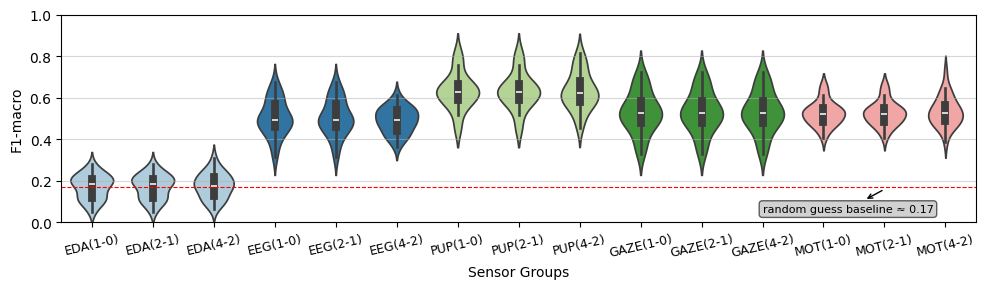

In [49]:
OUTPUT = 1

order=['EDA(1-0)', 'EDA(2-1)', 'EDA(4-2)', 'EEG(1-0)', 'EEG(2-1)', 'EEG(4-2)', \
       'PUPIL(1-0)', 'PUPIL(2-1)', 'PUPIL(4-2)', 'GAZE(1-0)', 'GAZE(2-1)', 'GAZE(4-2)', 'MOTION(1-0)', 'MOTION(2-1)', 'MOTION(4-2)', ]
xticks=['EDA(1-0)', 'EDA(2-1)', 'EDA(4-2)', 'EEG(1-0)', 'EEG(2-1)', 'EEG(4-2)', 'PUP(1-0)', 'PUP(2-1)', 'PUP(4-2)', \
        'GAZE(1-0)', 'GAZE(2-1)', 'GAZE(4-2)', 'MOT(1-0)', 'MOT(2-1)', 'MOT(4-2)', ]
# xticks = ['EDA(2-1)', '-(4-2)', 'EEG(2-1)', '-(4-2)', 'MOTION(2-1)', '-(4-2)', 'EYE(2-1)', '-(4-2)',]
w=0.7


_, ax =plt.subplots(figsize=(10,3))
# sns.barplot(data=mm, x='group', y='value', hue='score', order=order, gap=0,palette="Paired",\
            # ax=ax, errorbar='sd', width=w, saturation=0.7, capsize=0.2, err_kws={'linewidth': 1.3})

sns.violinplot(data=mm[mm.score == 'F1-macro'], x='group', y='value', hue='data', order=order, gap=0,palette="Paired",\
            ax=ax, width=w)
ax.grid(axis='y', alpha=0.5)
ax.set_xlabel('Sensor Groups')
ax.set_ylabel('F1-macro')
ax.set_xticklabels(xticks, fontsize=9, rotation=13,ha='center')
ax.legend().remove()
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_ylim(0,1)
# ax.set_title('Classifier Accuracy with single sensor group ')
# sns.despine(ax=ax, top=True, right=True)

plt.tight_layout()
ax.axhline(y=0.17, xmin=0, xmax=8, c='red', linewidth=0.8, linestyle='--')
ax.annotate(
    'random guess baseline ≈ 0.17',
    xy=(13, 0.16), xycoords='data',
    xytext=(11, 0.05), textcoords='data',
    arrowprops=dict(facecolor='black', arrowstyle='<-'),
    fontsize=8, color='black', bbox = dict(boxstyle="round", fc="0.7", alpha=0.6)
)

if OUTPUT:
    plt.savefig('../images/classification_svm_6.pdf', bbox_inches='tight')
plt.show()

## Fusion

In [105]:
import re

def load_fusion_data(folder, tw='*'):
    clfs = dict()
    files = glob.glob(f'models/{folder}/*(6)-{tw}-*')
    print(len(files), 'classifiers')
    for file in files:
        dt = re.match(r'(?:.+)FUSION\(\d\)-\d-\d-(([A-Z]+\+?){1,})(?:.+)', file).groups()[0]
        clf = pickle.load(open(file, 'rb'))
        clfs.update({dt: clf})
    return clfs


clfs = load_fusion_data('(fusion)11_01_2025-07_35_PM', tw='4-2')
print(clfs.keys())
scores, avgs = load_scores(clfs, '4-2')

# clfs2 = load_fusion_data('(fusion)11_01_2025-07_35_PM', tw='2-1')
# print(clfs2.keys())
# scores2, avgs2 = load_scores(clfs2, '2-1')
# avgs = pd.concat([avgs, avgs2])
avgs

26 classifiers
dict_keys(['EEG+PUPIL+EDA', 'EEG+PUPIL+GAZE', 'MOTION+EDA', 'EEG+PUPIL', 'MOTION+GAZE', 'PUPIL+EDA', 'EEG+GAZE', 'EEG+PUPIL+EDA+GAZE', 'EEG+MOTION+PUPIL+EDA+GAZE', 'EEG+MOTION+GAZE', 'MOTION+PUPIL', 'MOTION+PUPIL+GAZE', 'EDA+GAZE', 'EEG+EDA+GAZE', 'EEG+EDA', 'EEG+MOTION+PUPIL', 'MOTION+PUPIL+EDA', 'EEG+MOTION+PUPIL+EDA', 'PUPIL+GAZE', 'EEG+MOTION+PUPIL+GAZE', 'MOTION+EDA+GAZE', 'EEG+MOTION+EDA+GAZE', 'EEG+MOTION+EDA', 'MOTION+PUPIL+EDA+GAZE', 'PUPIL+EDA+GAZE', 'EEG+MOTION'])
26 classifiers
dict_keys(['EEG+MOTION+EDA', 'EEG+MOTION+PUPIL+GAZE', 'MOTION+EDA+GAZE', 'EEG+MOTION+PUPIL', 'EEG+PUPIL+EDA', 'MOTION+PUPIL', 'EEG+EDA+GAZE', 'MOTION+PUPIL+EDA+GAZE', 'EEG+MOTION', 'EEG+MOTION+PUPIL+EDA', 'PUPIL+GAZE', 'EEG+EDA', 'EEG+MOTION+EDA+GAZE', 'EEG+PUPIL+EDA+GAZE', 'MOTION+PUPIL+GAZE', 'PUPIL+EDA', 'EEG+MOTION+GAZE', 'EEG+GAZE', 'PUPIL+EDA+GAZE', 'EDA+GAZE', 'EEG+PUPIL+GAZE', 'EEG+MOTION+PUPIL+EDA+GAZE', 'MOTION+PUPIL+EDA', 'MOTION+EDA', 'MOTION+GAZE', 'EEG+PUPIL'])


,test_Precision,train_Precision,test_Recall,train_Recall,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro,data,tw
0,0.801190,0.952045,0.815385,0.933283,0.765957,0.937190,0.790635,0.941075,EEG+PUPIL+EDA,4-2
1,0.813399,0.952495,0.711661,0.936110,0.744186,0.939044,0.703846,0.943086,EEG+PUPIL+EDA,4-2
2,0.879167,0.954800,0.766005,0.936151,0.812500,0.938792,0.769078,0.944033,EEG+PUPIL+EDA,4-2
3,0.557540,0.965082,0.524074,0.944713,0.500000,0.948887,0.507404,0.953420,EEG+PUPIL+EDA,4-2
4,0.787500,0.957189,0.716005,0.939011,0.723404,0.942149,0.726291,0.946662,EEG+PUPIL+EDA,4-2
...,...,...,...,...,...,...,...,...,...,...
22,0.781349,0.943582,0.808081,0.930936,0.750000,0.932732,0.781196,0.936102,EEG+PUPIL,2-1
23,0.666906,0.954242,0.678042,0.941077,0.625000,0.942576,0.649597,0.946280,EEG+PUPIL,2-1
24,0.744907,0.952844,0.743056,0.936362,0.729167,0.938474,0.736749,0.943096,EEG+PUPIL,2-1
25,0.807738,0.961099,0.797607,0.949630,0.770833,0.949959,0.775371,0.954553,EEG+PUPIL,2-1


In [106]:
mm = avgs.melt(['data', 'tw'])
mm['score'] = [v.split('_')[1] for v in mm['variable']]
mm['cond'] = [v.split('_')[0] for v in mm['variable']]
# mm['group'] = mm.apply(lambda x: f"{x[0]}({x[1]})", axis=1)
mm['group'] = mm['data'].values
mm = mm[(mm.score.isin(['Accuracy', 'F1-macro'])) & (mm.cond == 'test')]
mm

,data,tw,variable,value,score,cond,group
0,EEG+PUPIL+EDA,4-2,test_Precision,0.801190,Precision,test,EEG+PUPIL+EDA
1,EEG+PUPIL+EDA,4-2,test_Precision,0.813399,Precision,test,EEG+PUPIL+EDA
2,EEG+PUPIL+EDA,4-2,test_Precision,0.879167,Precision,test,EEG+PUPIL+EDA
3,EEG+PUPIL+EDA,4-2,test_Precision,0.557540,Precision,test,EEG+PUPIL+EDA
4,EEG+PUPIL+EDA,4-2,test_Precision,0.787500,Precision,test,EEG+PUPIL+EDA
...,...,...,...,...,...,...,...
11355,EEG+PUPIL,2-1,train_F1-macro,0.936102,F1-macro,train,EEG+PUPIL
11356,EEG+PUPIL,2-1,train_F1-macro,0.946280,F1-macro,train,EEG+PUPIL
11357,EEG+PUPIL,2-1,train_F1-macro,0.943096,F1-macro,train,EEG+PUPIL
11358,EEG+PUPIL,2-1,train_F1-macro,0.954553,F1-macro,train,EEG+PUPIL


In [109]:
# mm.to_csv('../results/fusion_classficiation_results.csv', index=False)

In [98]:
result = mm.groupby(["group"])['value'].aggregate(np.mean).reset_index().sort_values('value')
result

/tmp/ipykernel_20532/243785433.py:1: FutureWarning: The provided callable <function mean at 0x7fc9d046b4c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result = mm.groupby(["group"])['value'].aggregate(np.mean).reset_index().sort_values('value')


,group,value
16,MOTION+EDA,0.484218
1,EEG+EDA,0.486782
4,EEG+MOTION,0.577345
0,EDA+GAZE,0.578360
5,EEG+MOTION+EDA,0.584307
23,PUPIL+EDA,0.656965
19,MOTION+PUPIL,0.698799
20,MOTION+PUPIL+EDA,0.708138
17,MOTION+EDA+GAZE,0.718974
13,EEG+PUPIL+EDA,0.721793


In [99]:
fusion_order = [
    'EEG+EDA', 'EEG+PUPIL', 'PUPIL+EDA', 'MOTION+GAZE',
    'MOTION+PUPIL', 'EEG+MOTION', 'MOTION+EDA', 'EEG+GAZE', 'EDA+GAZE', 'PUPIL+GAZE',
    'EEG+PUPIL+EDA', 'EEG+MOTION+GAZE', 'EEG+EDA+GAZE',
    'PUPIL+EDA+GAZE', 'EEG+MOTION+EDA', 'EEG+PUPIL+GAZE',
    'MOTION+PUPIL+GAZE', 'EEG+MOTION+PUPIL', 'MOTION+PUPIL+EDA',
    'MOTION+EDA+GAZE', 'EEG+PUPIL+EDA+GAZE', 'EEG+MOTION+PUPIL+EDA', 'EEG+MOTION+EDA+GAZE',
    'MOTION+PUPIL+EDA+GAZE', 'EEG+MOTION+PUPIL+GAZE', 'EEG+MOTION+PUPIL+EDA+GAZE'
]


fusion_ticks = [
    'EDA+EEG', 'EEG+PUP', 'EDA+PUP', 'MOT+GAZ',
    'PUP+MOT', 'EEG+MOT', 'EDA+MOT', 'EEG+GAZ', 'EDA+GAZE', 'PUP+GAZ',
    'EDA+EEG+PUP', 'EEG+MOT+GAZ', 'EDA+EEG+GAZ',
    'EDA+PUP+GAZ', 'EDA+EEG+MOT', 'EEG+PUP+GAZ',
    'PUP+MOT+GAZ', 'EEG+PUP+MOT', 'EDA+PUP+MOT',
    'EDA+MOT+GAZ', 'EDA+EEG+PUP+GAZ', 'EDA+EEG+PUP+MOT', 'EDA+EEG+MOT+GAZ',
    'EDA+PUP+MOT+GAZ', 'EEG+PUP+MOT+GAZ', 'EDA+EEG+PUP+MOT+GAZ'
]
fusion_ticks = [x.replace('+', '+\n') for x in fusion_ticks]

/tmp/ipykernel_20532/723533948.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(fusion_ticks, fontsize=8 )#rotation=30,ha='center')
/tmp/ipykernel_20532/723533948.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


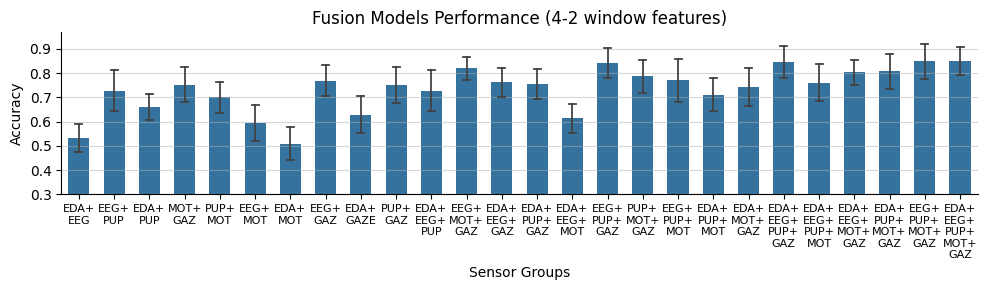

In [100]:
OUTPUT = 1

order = result.group.unique()
# xticks = [x.replace('MOTION', 'MOT') for x in xticks]
# xticks = [x.replace('PUPIL', 'PUP') for x in xticks]
w=0.6

_, ax =plt.subplots(figsize=(10,3))
sns.barplot(data=mm[mm.score == 'Accuracy'], x='group', y='value', order=fusion_order, gap=0,\
            ax=ax, errorbar='sd', width=w, saturation=0.7, capsize=0.2, err_kws={'linewidth': 1.3})
ax.grid(axis='y', alpha=0.5)
ax.set_ylim(0.3,)
ax.set_xlabel('Sensor Groups')
ax.set_ylabel('Accuracy')
ax.set_xticklabels(fusion_ticks, fontsize=8 )#rotation=30,ha='center')
ax.legend().remove()
ax.set_yticks(np.arange(0.3, 1, 0.1))
ax.set_title('Fusion Models Performance (4-2 window features)')
sns.despine(ax=ax, top=True, right=True)

plt.tight_layout()
# ax.axhline(y=0.17, xmin=0, xmax=8, c='red', linewidth=0.8, linestyle='--')
# ax.annotate(
#     'random guess baseline',
#     xy=(5.8, 0.18), xycoords='data',
#     xytext=(5, 0.3), textcoords='data',
#     arrowprops=dict(facecolor='black', arrowstyle='<-'),
#     fontsize=9, color='black', bbox = dict(boxstyle="round", fc="0.8", alpha=0.7)
# )

if OUTPUT:
    plt.savefig('../images/classification_fusion_6_42_accuracy.pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_20532/2672494952.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(fusion_ticks, fontsize=8 )#rotation=30,ha='center')
/tmp/ipykernel_20532/2672494952.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


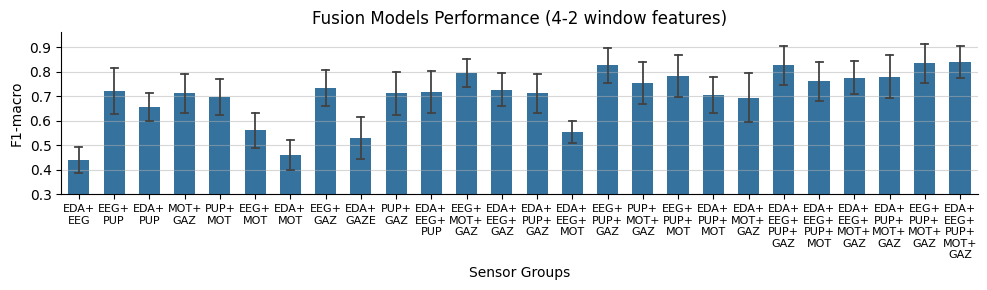

In [101]:
OUTPUT = 1

order = result.group.unique()
w=0.6

_, ax =plt.subplots(figsize=(10,3))
sns.barplot(data=mm[mm.score == 'F1-macro'], x='group', y='value', order=fusion_order, gap=0,\
            ax=ax, errorbar='sd', width=w, saturation=0.7, capsize=0.2, err_kws={'linewidth': 1.3})
ax.grid(axis='y', alpha=0.5)
ax.set_ylim(0.3,)
ax.set_xlabel('Sensor Groups')
ax.set_ylabel('F1-macro')
ax.set_xticklabels(fusion_ticks, fontsize=8 )#rotation=30,ha='center')
ax.legend().remove()
ax.set_yticks(np.arange(0.3, 1, 0.1))
ax.set_title('Fusion Models Performance (4-2 window features)')
sns.despine(ax=ax, top=True, right=True)

plt.tight_layout()

if OUTPUT:
    plt.savefig('../images/classification_fusion_6_42_f1.pdf', bbox_inches='tight')
plt.show()

In [102]:

clfs = load_fusion_data('(fusion)11_01_2025-07_35_PM', tw='2-1')
print(clfs.keys())
scores, avgs = load_scores(clfs, '2-1')

26 classifiers
dict_keys(['EEG+MOTION+EDA', 'EEG+MOTION+PUPIL+GAZE', 'MOTION+EDA+GAZE', 'EEG+MOTION+PUPIL', 'EEG+PUPIL+EDA', 'MOTION+PUPIL', 'EEG+EDA+GAZE', 'MOTION+PUPIL+EDA+GAZE', 'EEG+MOTION', 'EEG+MOTION+PUPIL+EDA', 'PUPIL+GAZE', 'EEG+EDA', 'EEG+MOTION+EDA+GAZE', 'EEG+PUPIL+EDA+GAZE', 'MOTION+PUPIL+GAZE', 'PUPIL+EDA', 'EEG+MOTION+GAZE', 'EEG+GAZE', 'PUPIL+EDA+GAZE', 'EDA+GAZE', 'EEG+PUPIL+GAZE', 'EEG+MOTION+PUPIL+EDA+GAZE', 'MOTION+PUPIL+EDA', 'MOTION+EDA', 'MOTION+GAZE', 'EEG+PUPIL'])


In [103]:
mm = avgs.melt(['data', 'tw'])
mm['score'] = [v.split('_')[1] for v in mm['variable']]
mm['cond'] = [v.split('_')[0] for v in mm['variable']]
# mm['group'] = mm.apply(lambda x: f"{x[0]}({x[1]})", axis=1)
mm['group'] = mm['data'].values
mm = mm[(mm.score.isin(['Accuracy', 'F1-macro'])) & (mm.cond == 'test')]
mm

,data,tw,variable,value,score,cond,group
2840,EEG+MOTION+EDA,2-1,test_Accuracy,0.541667,Accuracy,test,EEG+MOTION+EDA
2841,EEG+MOTION+EDA,2-1,test_Accuracy,0.522727,Accuracy,test,EEG+MOTION+EDA
2842,EEG+MOTION+EDA,2-1,test_Accuracy,0.604167,Accuracy,test,EEG+MOTION+EDA
2843,EEG+MOTION+EDA,2-1,test_Accuracy,0.500000,Accuracy,test,EEG+MOTION+EDA
2844,EEG+MOTION+EDA,2-1,test_Accuracy,0.520833,Accuracy,test,EEG+MOTION+EDA
...,...,...,...,...,...,...,...
4965,EEG+PUPIL,2-1,test_F1-macro,0.781196,F1-macro,test,EEG+PUPIL
4966,EEG+PUPIL,2-1,test_F1-macro,0.649597,F1-macro,test,EEG+PUPIL
4967,EEG+PUPIL,2-1,test_F1-macro,0.736749,F1-macro,test,EEG+PUPIL
4968,EEG+PUPIL,2-1,test_F1-macro,0.775371,F1-macro,test,EEG+PUPIL


/tmp/ipykernel_20532/2710249297.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(fusion_ticks, fontsize=8 )#rotation=30,ha='center')
/tmp/ipykernel_20532/2710249297.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


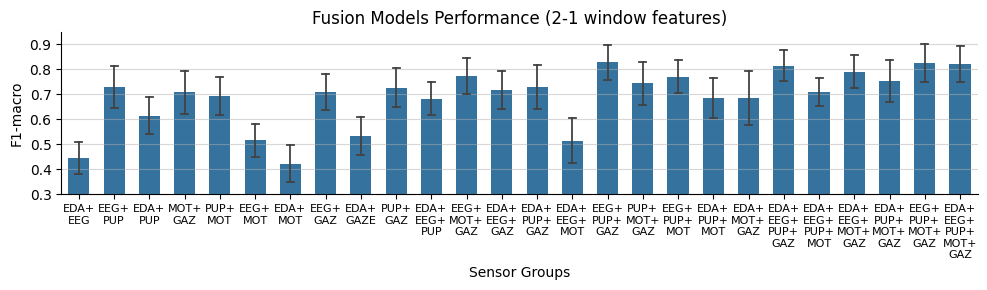

In [104]:
OUTPUT = 1

order = result.group.unique()
# xticks = [x.replace('MOTION', 'MOT') for x in xticks]
# xticks = [x.replace('PUPIL', 'PUP') for x in xticks]
w=0.6

_, ax =plt.subplots(figsize=(10,3))
sns.barplot(data=mm[mm.score == 'F1-macro'], x='group', y='value', order=fusion_order, gap=0,\
            ax=ax, errorbar='sd', width=w, saturation=0.7, capsize=0.2, err_kws={'linewidth': 1.3})
ax.grid(axis='y', alpha=0.5)
ax.set_ylim(0.3,)
ax.set_xlabel('Sensor Groups')
ax.set_ylabel('F1-macro')
ax.set_xticklabels(fusion_ticks, fontsize=8 )#rotation=30,ha='center')
ax.legend().remove()
ax.set_yticks(np.arange(0.3, 1, 0.1))
ax.set_title('Fusion Models Performance (2-1 window features)')
sns.despine(ax=ax, top=True, right=True)

plt.tight_layout()

if OUTPUT:
    plt.savefig('../images/classification_fusion_6_21_f1.pdf', bbox_inches='tight')
plt.show()

### AUC

EDA 6
n features 29
Micro-averaged One-vs-Rest ROC AUC score: 0.84
Macro OvR ROC AUC score: 0.83
EEG 6
n features 180
Micro-averaged One-vs-Rest ROC AUC score: 0.99
Macro OvR ROC AUC score: 0.99
MOTION 6
n features 13
Micro-averaged One-vs-Rest ROC AUC score: 0.95
Macro OvR ROC AUC score: 0.94
EYE 6
n features 32
Micro-averaged One-vs-Rest ROC AUC score: 0.99
Macro OvR ROC AUC score: 0.98


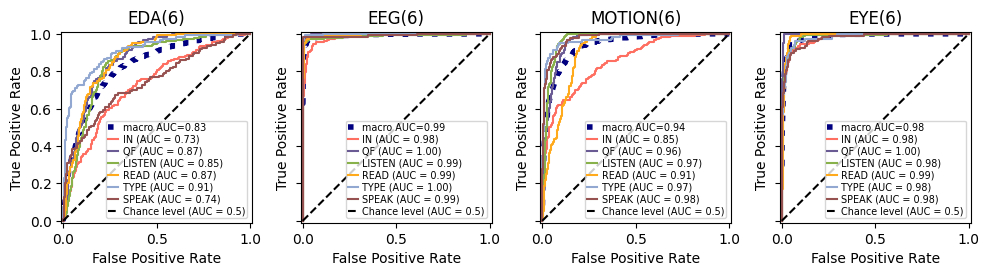

In [403]:
label_binarizer = None
target_set = target_set2
n_classes = 6

fig, axes = plt.subplots(ncols=4, figsize=(10, 6), sharex=True, sharey=True)

for n, data_type in enumerate(clfs.keys()):
    y_score, y_true = load_scores(clfs, data_type, n_classes)
    if label_binarizer is None:
        label_binarizer = LabelBinarizer().fit(y_true)
    y_onehot_test = label_binarizer.transform(y_true)
    add_plot(axes[n], y_onehot_test, y_score, data_type)
    _ = axes[n].set(ylabel="True Positive Rate",)
    _ = axes[n].set(xlabel="False Positive Rate", ylabel="True Positive Rate",)
    _ = axes[n].set(xlabel="False Positive Rate",)
# axes[1,1].legend(bbox_to_anchor=[0.5, 0.5])
plt.tight_layout()
plt.savefig(f'AUC_SVM_OVR_{n_classes}_classification.pdf', bbox_inches='tight')
plt.show()

NameError: name 'load_cm_scores' is not defined

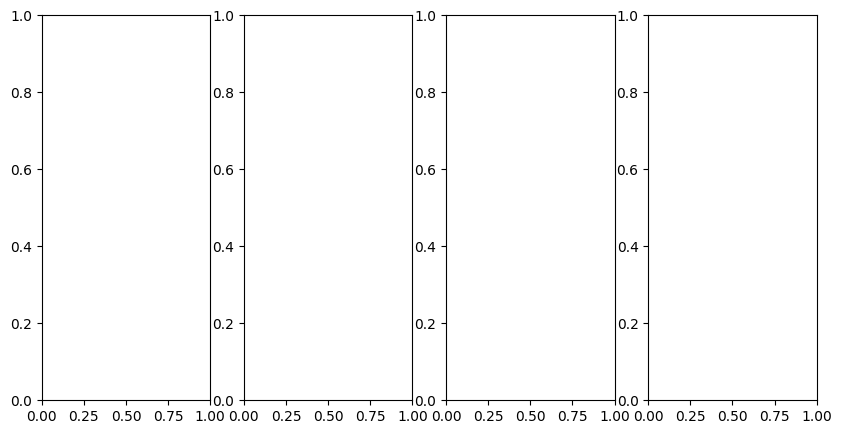

In [24]:
_, ax= plt.subplots(ncols=4, figsize=(10,5))

for n, data_type in enumerate(data_types):
    y_score, y_true = load_cm_scores(clfs, data_type, n_classes)
    cm = confusion_matrix(y_true, y_score)
    
    sns.heatmap(cm, annot=True, fmt='g', ax=ax[n], cmap=plt.cm.Blues, square=True, 
                xticklabels=target_set, 
                yticklabels=target_set, linewidths=0.2, cbar=False,
                annot_kws={
                'fontsize': 10,
            })
    _ = ax[n].set(
        xlabel="Predicted labels",
        ylabel="True labels",
        title=f"{data_type}({n_classes})",
    )
    ax[n].set_yticklabels(ax[n].get_yticklabels(), rotation = 0)
    ax[n].set_xticklabels(ax[n].get_xticklabels(), rotation = 35,)

plt.tight_layout()
# plt.savefig(f'CM_{n_classes}_classification.pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_22201/2027984703.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,1].set_xticklabels(motion_aucs[i]['PID'].values)


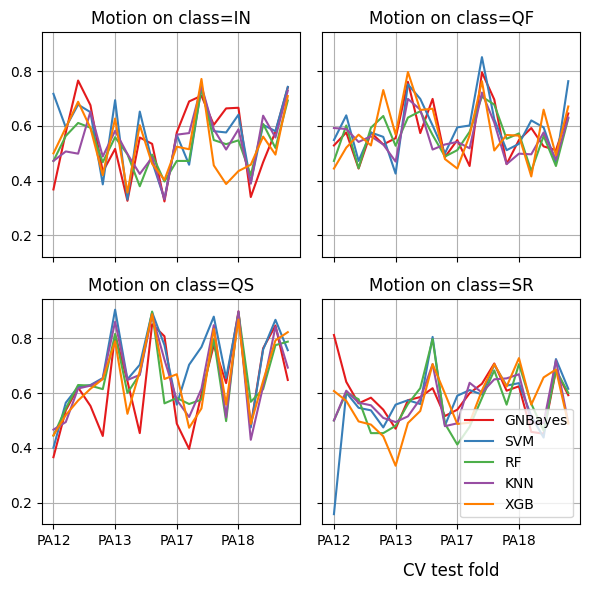

Model Average scores:
 [GNBayes    0.56
SVM        0.57
RF         0.53
KNN        0.54
XGB        0.53
dtype: float64, GNBayes    0.58
SVM        0.60
RF         0.56
KNN        0.56
XGB        0.58
dtype: float64, GNBayes    0.63
SVM        0.71
RF         0.65
KNN        0.66
XGB        0.65
dtype: float64, GNBayes    0.59
SVM        0.57
RF         0.56
KNN        0.57
XGB        0.57
dtype: float64]
Overall Average scores: 0.5881452546296296


In [150]:
fig, ax = plt.subplots(2, 2, figsize=(6,6), sharex=True, sharey=True)

r, c = 0,0
for i in [0, 1,2,3]:
    sns.lineplot(
        data=motion_aucs[i],
        dashes=False,
        palette="Set1",
        # marker="o",
        # alpha=0.5,
        ax=ax[r, c],
    )
    ax[r,c].set_title(f'Motion on class={target_set1[i]}')
    ax[r,c].legend().remove()
    ax[r,c].grid()
    c+=1
    if c == 2:
        r +=1 
        c = 0

ax[1,1].tick_params(bottom=True, labelbottom=True)
ax[1,1].set_xticklabels(motion_aucs[i]['PID'].values)
ax[1,1].set_xlabel("CV test fold", size=12, labelpad=10)
ax[1,1].set_ylabel("Model AUC", size=12)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


print('Model Average scores:\n', [d.iloc[:, :-1].mean().round(2) for d in motion_aucs])
print('Overall Average scores:', ([d.iloc[:, :-1].mean().values for d in motion_aucs]))